In [1]:
#pip install rdkit pandas numpy seaborn sklearn

In [2]:
# https://www.rdkit.org/
import rdkit
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo), mol))

# Morgan_fingerprint

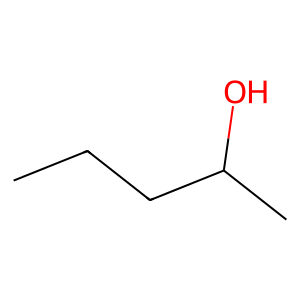

In [18]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

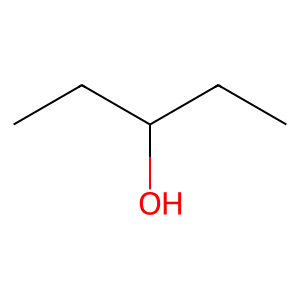

In [19]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [20]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X["molecule"] = TEST_X["SMILE"].apply(lambda x: Chem.MolFromSmiles(x))
TEST_X["morgan_fp"] = TEST_X["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True))
TEST_X

,SMILE,molecule,morgan_fp
0,CCCC(C)O,<rdkit.Chem.rdchem.Mol object at 0x000001AC254...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CCC(CC)O,<rdkit.Chem.rdchem.Mol object at 0x000001AC254...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [21]:
#rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True)

In [22]:
def SmileToMorganFP_df(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_array = np.array(morgan_fp)
    morgan_dataframe = pd.DataFrame(morgan_array)
    morgan_dataframe_row = morgan_dataframe.T
    return morgan_dataframe_row
def SmileToMorganFP(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_bit = morgan_fp.GetOnBits()
    morgan_array = np.array(morgan_fp)
    return morgan_array,tuple(morgan_bit)

In [23]:
# STEP 0 
'''
name1 = "CCCCCCCCCO"
name2 = "CCCCCCCCCCO"
'''

'\nname1 = "CCCCCCCCCO"\nname2 = "CCCCCCCCCCO"\n'

In [24]:
# STEP 1
fp1 = SmileToMorganFP(name1)
fp2 = SmileToMorganFP(name2)

In [25]:
# STEP 2
# Find Diff Feature

fp_bit1=fp1[1]
fp_bit2=fp2[1]
all_diff = set(fp_bit1).symmetric_difference(set(fp_bit2))
diff2_from1 = set(fp_bit1)-set(fp_bit2)
diff1_from2 = set(fp_bit2)-set(fp_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 [42, 47, 144, 193, 243]
M2 Diff from M1: 
 [47, 144, 243]
M1 Diff from M2: 
 [42, 193]


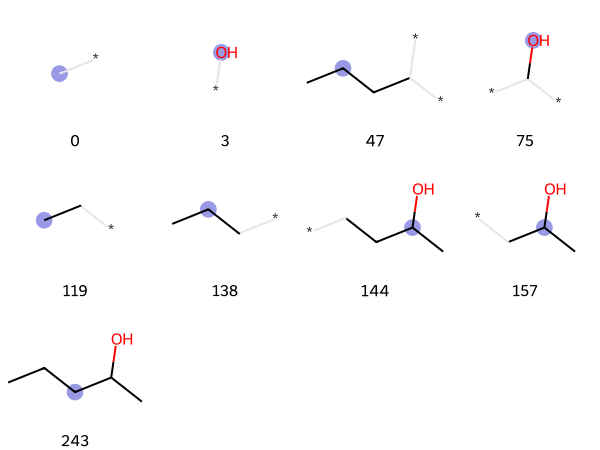

In [26]:
onbits = {}
mf = rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True, bitInfo=onbits)
all_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

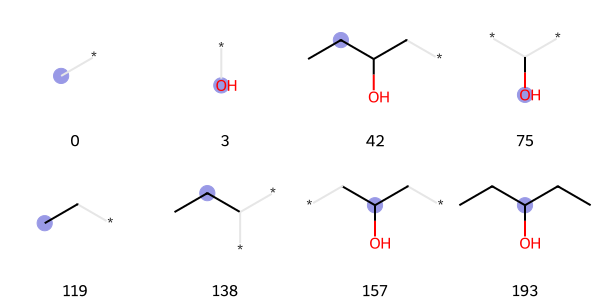

In [27]:
onbits = {}
mf = rdMolDescriptors.GetMorganFingerprintAsBitVect(m2, radius=4, nBits=250, useFeatures=True, useChirality=True, bitInfo=onbits)
all_fragments = [(m2, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

In [28]:
'''
onbits = {}
all_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])
'''
#all_fragments

'\nonbits = {}\nall_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]\nDraw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])\n'

In [29]:
print(fp1[0])
print(fp2[0])

# print On bits
print("Index of On bits 1: \n",fp_bit1)
print("Index of On bits 2: \n",fp_bit2)
# how many bits are On?
print("Number of On bits 1: \n",len(fp_bit1))
print("Number of On bits 2: \n",len(fp_bit2))

print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

print("\n250 BITS")

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# MACCS

In [30]:
import requests
CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"
def smiles_to_iupac(smiles):
    rep = "iupac_name"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

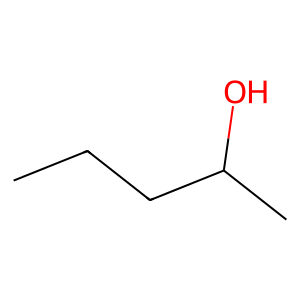

In [6]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

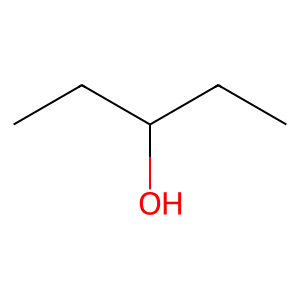

In [7]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [33]:
'''
name1 = "CCCCCCCCCO"
name2 = "CCCCCCCCCCO"
'''

'\nname1 = "CCCCCCCCCO"\nname2 = "CCCCCCCCCCO"\n'

In [34]:
# Generate MACCS (Molecular ACCess System) keys
from rdkit.Chem import MACCSkeys
Mkeys1 = MACCSkeys.GenMACCSKeys(m1)
Mkeys2 = MACCSkeys.GenMACCSKeys(m2)
# Use numpy array to see On and Off bits
arr_mkey1 = np.array(Mkeys1)
arr_mkey2 = np.array(Mkeys2)

#print(arr_mkey1)
#print(arr_mkey2)

arr_bit1 = tuple(Mkeys1.GetOnBits())
arr_bit2 = tuple(Mkeys2.GetOnBits())

# print On bits
print("Index of On bits 1:",tuple(Mkeys1.GetOnBits()))
print("Index of On bits 2:",tuple(Mkeys2.GetOnBits()))
# how many bits are On?
print("Number of On bits 1: ",len(Mkeys2.GetOnBits()))
print("Number of On bits 2: ",len(Mkeys2.GetOnBits()))


Index of On bits 1: (90, 104, 114, 115, 116, 118, 132, 139, 147, 149, 152, 155, 157, 160, 164)
Index of On bits 2: (104, 114, 116, 132, 139, 149, 152, 155, 157, 160, 164)
Number of On bits 1:  11
Number of On bits 2:  11


In [35]:
all_diff = set(arr_bit1).symmetric_difference(set(arr_bit2))
diff2_from1 = set(arr_bit1)-set(arr_bit2)
diff1_from2 = set(arr_bit2)-set(arr_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 [90, 115, 118, 147]
M2 Diff from M1: 
 [90, 115, 118, 147]
M1 Diff from M2: 
 []


In [36]:
print(arr_mkey1)
print(arr_mkey2)

# print On bits
print("Index of On bits 1: \n",tuple(Mkeys1.GetOnBits()))
print("Index of On bits 2: \n",tuple(Mkeys2.GetOnBits()))
# how many bits are On?
print("Number of On bits 1: \n",len(Mkeys2.GetOnBits()))
print("Number of On bits 2: \n",len(Mkeys2.GetOnBits()))

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0]
Index of On bits 1: 
 (90, 104, 114, 115, 116, 118, 132, 139, 147, 149, 152, 155, 157, 160, 164)
Index of On bits 2: 
 (104, 114, 116, 132, 139, 149, 152, 155, 157, 160, 164)
Number of On bits 1: 
 11
Number of On bits 2: 
 11
All Diff index: 
 [90, 115, 118, 147]
M2 Diff from M1: 
 [90, 115, 118, 147]
M1 Diff from M2:

In [37]:
#90:  ('[$([!#6;!#1;!H0]~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[CH2;R]1)]', 0),  # QHAACH2A
#115: ('[CH3]~*~[CH2]~*', 0),  # CH3ACH2A
#118: ('[$(*~[CH2]~[CH2]~*),$(*1~[CH2]~[CH2]1)]', 1),  # ACH2CH2A > 1
#147: ('[$(*~[CH2]~[CH2]~*),$([R]1@[CH2;R]@[CH2;R]1)]', 0),  # ACH2CH2A

# Increase Morgan_fp Bit

In [5]:
########   Prepare Data     ########
#Import Data
df = pd.read_excel("SMILE_only.xlsx",sheet_name="All_SMILE")

#Select feature for data
X_data= df["SMILES"]
#Y_data= df["Tb"]


In [6]:
#get Morgan_fp of all substance ex 560 datapoint
mols = []
#SMILES=np.array(X_data["SMILES"])
SMILES=np.array(X_data)
for SMILE in SMILES:
    mol = Chem.MolFromSmiles(SMILE)
    mols.append(mol)

# we get 560 fp in FP_all
# FP_all = [fp_1, fp_2, ... , fp_560]
# Loop 

# see CURRENTLY_USE in 256, 512, ..., 2048 bit
# np.logical_or(FP_all).sum()
# >>> 156 bit use in 256 bit

In [7]:
# Looping
bits = [2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16, 2**17]
#mols = [m1, m2, ..., m560]
#mols = [m1, m2]

#32768    1 min
#65536    1 min
#131072   5 min
unique=[]
for bit in bits:
    FPs = []
    infos = []
    for mol in mols:
        info = {}
        FPs.append(AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=bit, bitInfo=info, useFeatures=True))
        infos.append(info)
    unique.append(np.logical_or.reduce(FPs).sum())

In [9]:
unique

[976, 1620, 2218, 2628, 2875, 3011, 3076, 3112]

In [10]:
bits

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

In [18]:
np.array(unique)/np.array(bits)

array([0.953125  , 0.79101562, 0.54150391, 0.32080078, 0.17547607,
       0.09188843, 0.04693604, 0.02374268])

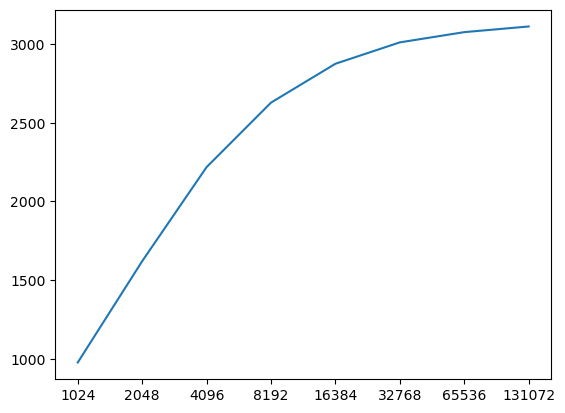

In [8]:
fig1,ax1 =plt.subplots()
ax1.plot(unique)
xticks = plt.xticks(range(len(bits)),bits)
ax1.yaxis.get_major_locator().set_params(integer=True)

In [19]:
fig1.savefig('Picture/my_figure.png', format='png')

# Morgan_fp SVM-LinearSVR

In [52]:
# %%
# Modeling

from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVM_regr_model = make_pipeline(StandardScaler(),
                               LinearSVR(dual="auto", random_state=0, tol=1e-5))
SVM_regr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual='auto', random_state=0, tol=1e-05))])

In [53]:
# %%
# Prediction & Validation

# Train set
y_predict_train = SVM_regr_model.predict(X_train)

#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = SVM_regr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
#y_predict_total = SVM_regr_model.predict(X_data)
#mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
#rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
#R2_total = r2_score(Y_data, y_predict_total)

In [54]:
# Table Score
table_train = pd.DataFrame({
    "Predict" : y_predict_train,
    "EXP" : y_train,
})

Morgan_fp__ML_RF = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test],
        "RMSE":[rmse_train, rmse_test],
        "R2"  :[R2_train, R2_test]
    }
Morgan_fp__ML_SVR = pd.DataFrame(data)
#Morgan_fp__ML_RF.to_csv('560 Morgan_fp ML-RF.csv', index=False)
Morgan_fp__ML_SVR

,MAPE,RMSE,R2
0,0.040732,33.243439,0.672754
1,0.075251,39.015267,0.605304


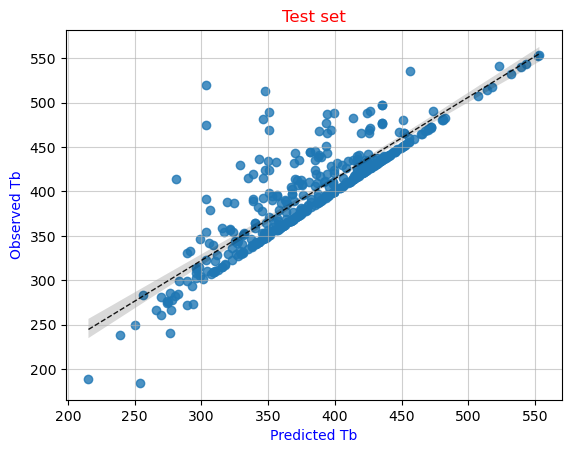

In [55]:
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp SVM-NuSVR

In [56]:
# %%
# Modeling

from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVM_regr_model = make_pipeline(StandardScaler(), NuSVR(C=1.0, nu=0.1))
SVM_regr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvr', NuSVR(nu=0.1))])

In [57]:
# %%
# Prediction & Validation

# Train set
y_predict_train = SVM_regr_model.predict(X_train)

#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = SVM_regr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
#y_predict_total = SVM_regr_model.predict(X_data)
#mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
#rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
#R2_total = r2_score(Y_data, y_predict_total)

In [58]:
# Table Score
table_train = pd.DataFrame({
    "Predict" : y_predict_train,
    "EXP" : y_train,
})

Morgan_fp__ML_RF = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test],
        "RMSE":[rmse_train, rmse_test],
        "R2"  :[R2_train, R2_test]
    }
Morgan_fp__ML_SVR = pd.DataFrame(data)
#Morgan_fp__ML_RF.to_csv('560 Morgan_fp ML-RF.csv', index=False)
Morgan_fp__ML_SVR

,MAPE,RMSE,R2
0,0.120649,56.430350,0.057050
1,0.138968,60.333668,0.056128


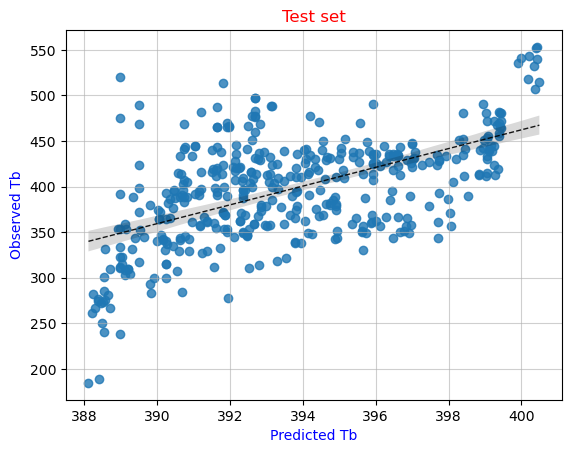

In [59]:
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp SVM-SVR

In [60]:
# %%
# Modeling

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVM_regr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVM_regr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [61]:
# %%
# Prediction & Validation

# Train set
y_predict_train = SVM_regr_model.predict(X_train)

#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = SVM_regr_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
#y_predict_total = SVM_regr_model.predict(X_data)
#mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
#rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
#R2_total = r2_score(Y_data, y_predict_total)

In [62]:
# Table Score
table_train = pd.DataFrame({
    "Predict" : y_predict_train,
    "EXP" : y_train,
})

Morgan_fp__ML_RF = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test],
        "RMSE":[rmse_train, rmse_test],
        "R2"  :[R2_train, R2_test]
    }
Morgan_fp__ML_SVR = pd.DataFrame(data)
#Morgan_fp__ML_RF.to_csv('560 Morgan_fp ML-RF.csv', index=False)
Morgan_fp__ML_SVR

,MAPE,RMSE,R2
0,0.112178,52.698894,0.177632
1,0.132532,57.094918,0.154743


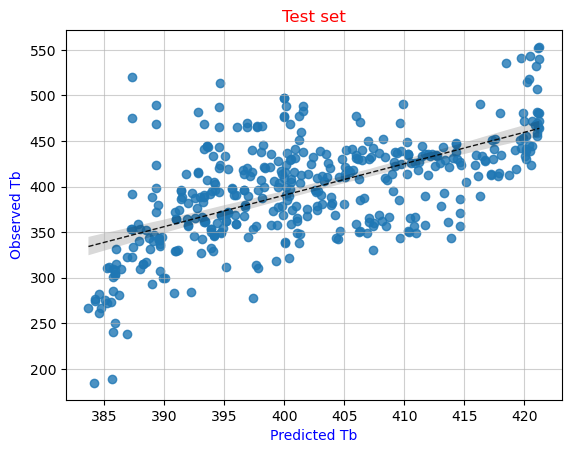

In [63]:
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp MLR

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 18 09:09:55 2023

@author: oomsin
"""

# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
import time


# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# RDKit
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

start_time = time.time()
# %% Setup
MF_bit = 2**10

# %% Import Data : 560 datapoint
#Import Data
df = pd.read_excel("DataTb.xlsx",sheet_name="AllDataSet")

#Select feature for data: X=SMILE, Y=Tb
X_data_excel= df[["SMILES"]]
Y_data= df["Tb"]

#>>> SHOW X_Data, Y_data

# %% Data Preparation
#Generate Fingerprint from SMILE
X_data_use = X_data_excel.copy()
X_data_use["molecule"] = X_data_use["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=MF_bit, useFeatures=True, useChirality=True))

#>>> SHOW X_data_use 

#Transfrom Fingerprint to Column in DataFrame
X_data_fp = []
for i in range(X_data_use.shape[0]):
    array = np.array(X_data_use["morgan_fp"][i])
    datafram_i = pd.DataFrame(array)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
X_data_fp = pd.concat(X_data_fp, ignore_index=True)
X_data_ML = pd.concat([X_data_use, X_data_fp], axis=1, join='inner')

Y_data_ML = Y_data.copy()

#>>>  SHOW X_data_fp, Y_data_fp

# %% Train test split

X_train_ML, X_test_ML, y_train_ML, y_test_ML = train_test_split(X_data_ML, Y_data_ML,test_size=0.25,random_state=42)

X_train = X_train_ML.copy().drop(columns = {"SMILES", "molecule", "morgan_fp"})
X_test = X_test_ML.copy().drop(columns = {"SMILES", "molecule", "morgan_fp"})
x_total = X_data_ML.copy().drop(columns = {"SMILES", "molecule", "morgan_fp"})

y_train = y_train_ML.copy()
y_test = y_test_ML.copy()
y_total = Y_data_ML.copy()

# >>> EXAMPLE SHOW {X, Y} of {TRAIN TEST TOTAL}

# %%
# Modeling


Linear = make_pipeline(StandardScaler(),
                               LinearRegression())
Linear.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Elapsed time: 1.0187091827392578


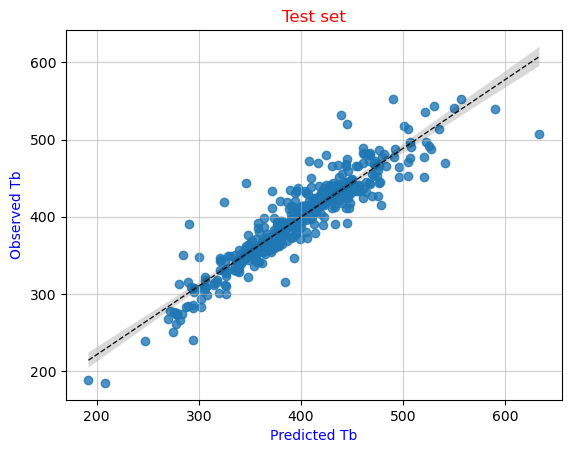

In [8]:
# %%   Validation with Error Metrics
mape_train_table = []
rmse_train_table = []
r2_train_table   = []

# Train set
y_predict_train = Linear.predict(X_train)
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

mape_train_table.append(mape_train)
rmse_train_table.append(rmse_train)
r2_train_table.append(R2_train)

# Test set
y_predict_test = Linear.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

mape_train_table.append(mape_test)
rmse_train_table.append(rmse_test)
r2_train_table.append(R2_test)

# Total set
y_predict_total = Linear.predict(x_total)
mape_total = mean_absolute_percentage_error(y_total, y_predict_total)
rmse_total = np.sqrt(mean_squared_error(y_total, y_predict_total))
R2_total = r2_score(y_total, y_predict_total)

mape_train_table.append(mape_total)
rmse_train_table.append(rmse_total)
r2_train_table.append(R2_total)

# %% Store score y_predict
# Table Score
Score_Table = pd.DataFrame()
data = {
        "MAPE":mape_train_table,
        "RMSE":rmse_train_table,
        "R2"  :r2_train_table
    }
Score_Table = pd.DataFrame(data)

# Train predict Table
Train_Table = pd.DataFrame()
data = {
        "X" :X_train_ML["SMILES"],
        "Y"  :y_train,
        "Y_predict" :y_predict_train
    }
Train_Table = pd.DataFrame(data)

# Test predict Table
Test_Table = pd.DataFrame()
data = {
        "X" :X_test_ML["SMILES"],
        "Y"  :y_test,
        "Y_predict" :y_predict_test
    }
Test_Table = pd.DataFrame(data)

# Total predict Table
Total_Table = pd.DataFrame()
data = {
        "X" :X_data_ML["SMILES"],
        "Y"  :y_total,
        "Y_predict" :y_predict_total
    }
Total_Table = pd.DataFrame(data)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time)
# %%  Export To Excel
# =============================================================================
# with pd.ExcelWriter("MLR_560point_x_bit.xlsx",mode='a') as writer:  
#     Train_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Train_Prediction')
#     Test_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Test_Prediction')
#     Total_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Total_Prediction')
#     
#     Score_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Score')
#     
# =============================================================================
# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)

# Morgan_fp MLR

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 18 09:09:55 2023

@author: oomsin
"""

# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
import time

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# RDKit
import rdkit
from rdkit.Chem import Descriptors
from rdkit.Chem import MACCSkeys
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

start_time = time.time()
# %% Setup
MF_bit = 2**10

# %% Import Data : 560 datapoint
#Import Data
df = pd.read_excel("DataTb.xlsx",sheet_name="AllDataSet")

#Select feature for data: X=SMILE, Y=Tb
X_data_excel= df[["SMILES"]]
Y_data= df["Tb"]

#>>> SHOW X_Data, Y_data

# %% Data Preparation
#Generate Fingerprint from SMILE
X_data_use = X_data_excel.copy()
X_data_use["molecule"] = X_data_use["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["MACCS"] = X_data_use["molecule"].apply(lambda x: rdkit.Chem.MACCSkeys.GenMACCSKeys(x))

#>>> SHOW X_data_use 

#Transfrom Fingerprint to Column in DataFrame
X_data_fp = []
for i in range(X_data_use.shape[0]):
    array = np.array(X_data_use["MACCS"][i])
    datafram_i = pd.DataFrame(array)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
X_data_fp = pd.concat(X_data_fp, ignore_index=True)
X_data_ML = pd.concat([X_data_use, X_data_fp], axis=1, join='inner')

Y_data_ML = Y_data.copy()

#>>>  SHOW X_data_fp, Y_data_fp

# %% Train test split

X_train_ML, X_test_ML, y_train_ML, y_test_ML = train_test_split(X_data_ML, Y_data_ML,test_size=0.25,random_state=42)

X_train = X_train_ML.copy().drop(columns = {"SMILES", "molecule", "MACCS"})
X_test = X_test_ML.copy().drop(columns = {"SMILES", "molecule", "MACCS"})
x_total = X_data_ML.copy().drop(columns = {"SMILES", "molecule", "MACCS"})

y_train = y_train_ML.copy()
y_test = y_test_ML.copy()
y_total = Y_data_ML.copy()

# >>> EXAMPLE SHOW {X, Y} of {TRAIN TEST TOTAL}

# %%
# Modeling

RF_model = make_pipeline(StandardScaler(),
                               RandomForestRegressor(random_state = 0, n_jobs=100))
RF_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=100, random_state=0))])

Elapsed time: 1.1397690773010254


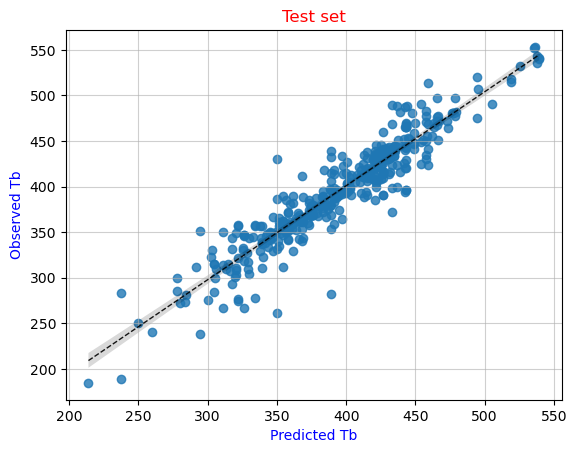

In [11]:
# %%   Validation with Error Metrics
mape_train_table = []
rmse_train_table = []
r2_train_table   = []

# Train set
y_predict_train = RF_model.predict(X_train)
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

mape_train_table.append(mape_train)
rmse_train_table.append(rmse_train)
r2_train_table.append(R2_train)

# Test set
y_predict_test = RF_model.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

mape_train_table.append(mape_test)
rmse_train_table.append(rmse_test)
r2_train_table.append(R2_test)

# Total set
y_predict_total = RF_model.predict(x_total)
mape_total = mean_absolute_percentage_error(y_total, y_predict_total)
rmse_total = np.sqrt(mean_squared_error(y_total, y_predict_total))
R2_total = r2_score(y_total, y_predict_total)

mape_train_table.append(mape_total)
rmse_train_table.append(rmse_total)
r2_train_table.append(R2_total)

# %% Store score y_predict
# Table Score
Score_Table = pd.DataFrame()
data = {
        "MAPE":mape_train_table,
        "RMSE":rmse_train_table,
        "R2"  :r2_train_table
    }
Score_Table = pd.DataFrame(data)

# Train predict Table
Train_Table = pd.DataFrame()
data = {
        "X" :X_train_ML["SMILES"],
        "Y"  :y_train,
        "Y_predict" :y_predict_train
    }
Train_Table = pd.DataFrame(data)

# Test predict Table
Test_Table = pd.DataFrame()
data = {
        "X" :X_test_ML["SMILES"],
        "Y"  :y_test,
        "Y_predict" :y_predict_test
    }
Test_Table = pd.DataFrame(data)

# Total predict Table
Total_Table = pd.DataFrame()
data = {
        "X" :X_data_ML["SMILES"],
        "Y"  :y_total,
        "Y_predict" :y_predict_total
    }
Total_Table = pd.DataFrame(data)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time)
# =============================================================================
# # %%  Export To Excel
# with pd.ExcelWriter("ML2_560point_x_bit.xlsx",mode='a') as writer:  
#     Train_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Train_Prediction')
#     Test_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Test_Prediction')
#     Total_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Total_Prediction')
#     
#     Score_Table.to_excel(writer, sheet_name=f'{MF_bit}_bit_Score')
# =============================================================================

# %%
# Visualization

p1=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":1,'ls':'--','color':'black',"alpha":0.9})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.6)